## Scenario

You want to buy an apartment of price: 350k

You have deposite for down payment: 200k


In [31]:
# unit: 10000
down_payment = 200
mortgage_years = 15

def calculate_wealth(down_payment, mortgage_years, property_price = 350, \
                     property_yearly_return_rate = 0.03, mortgage_yearly_rate = 0.0465, \
                     wealth_years = 30, current_wealth = 200, monthly_income = 3, \
                     family_expense = 0.5, financial_yearly_return_rate = 0.068):
    '''
    property_price = 350
    property_yearly_return_rate = 0.03

    mortgage_yearly_rate = 0.0465
    mortgage_monthly_rate = mortgage_yearly_rate / 12
    mortgage = property_price - down_payment

    wealth_years = 30
    current_wealth = 200
    monthly_income = 3
    family_expense = 0.5

    financial_yearly_return_rate = 0.068 <portfolio>
    financial_monthly_return_rate = financial_yearly_return_rate / 12
    '''
    mortgage_monthly_rate = mortgage_yearly_rate / 12
    mortgage = property_price - down_payment
    financial_monthly_return_rate = financial_yearly_return_rate / 12
    
    monthly_repayment = float(mortgage) * mortgage_monthly_rate * ((1 + mortgage_monthly_rate) ** (12 * mortgage_years)) / \
        ((1 + mortgage_monthly_rate) ** (12 * mortgage_years) - 1)

    cash_wealth = current_wealth - down_payment
    for this_month in range(0, 12 * wealth_years):
        cash_wealth = cash_wealth * (1 + financial_monthly_return_rate) + monthly_income - family_expense
        if this_month <= mortgage_years * 12:
            cash_wealth = cash_wealth - monthly_repayment

    property_wealth = property_price
    for this_year in range(0, wealth_years):
        property_wealth = property_wealth * (1 + property_yearly_return_rate)

    return round(monthly_repayment, 4), round(cash_wealth, 2), round(property_wealth, 2)


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(columns=['downpay200w_morgage30', 'downpay122.5w_morgage30', 'downpay122.5w_morgage15'],\
                 index=['monthly_repayment(w)', 'cash_after30years', 'property_after30years', 'total_wealth_after30years'])

for (plan, col) in zip([(200,30), (122.5,30), (122.5,15)], df.columns):
    down_payment, mortgage_years = plan
    monthly_repayment, cash_wealth, property_wealth = calculate_wealth(down_payment, \
                                                                       mortgage_years)
    total_wealth = round(cash_wealth+property_wealth, 2)
    df[col] = monthly_repayment, cash_wealth, property_wealth, total_wealth

In [38]:
df

,downpay200w_morgage30,downpay122.5w_morgage30,downpay122.5w_morgage15
monthly_repayment(w),0.7735,1.1731,1.7579
cash_after30years,2025.0700,2148.9600,2005.8200
property_after30years,849.5400,849.5400,849.5400
total_wealth_after30years,2874.6100,2998.5000,2855.3600


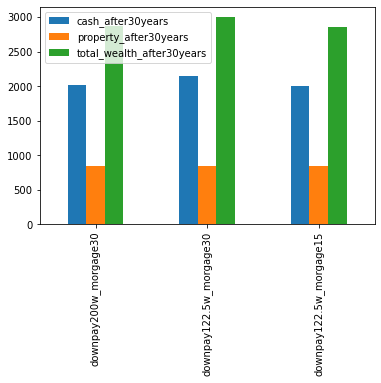

In [51]:
df[1:].T.plot.bar()
plt.show()